In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import time

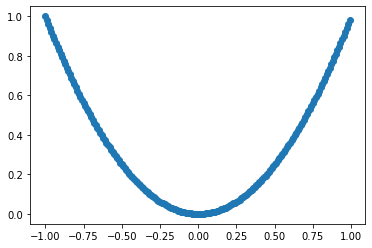

In [36]:
x = np.arange(-1,1, 0.01)
y = x**2

plt.scatter(x,y)

In [37]:
print(len(x))
print(len(y))
print(x.shape)

200
200
(200,)


In [38]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

# 모델 정의

In [39]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(1))

# 컴파일  : 모델 + optimizer + Loss

In [40]:
model.compile(optimizer = "SGD",loss = "mse",metrics = ["mse"])

# 학습

In [41]:
model.fit(x,y,epochs=1000,verbose = False, batch_size = 20)

# 예측

In [42]:
y_ = model.predict(x)

In [43]:
x.shape, y.shape, y_.shape

((200,), (200,), (200, 1))

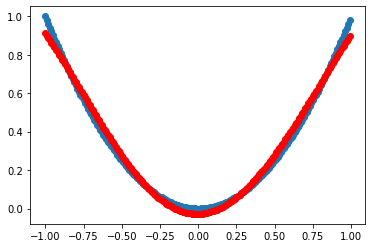

In [44]:
plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

In [45]:
loss, mae = model.evaluate(x,y)
print(loss)
print(mae)

7/7 [==============================] - 0s 2ms/step - loss: 8.3872e-04 - mse: 8.3872e-04
0.000838719482999295
0.000838719482999295


# 테스트 셋 분리 및 평가

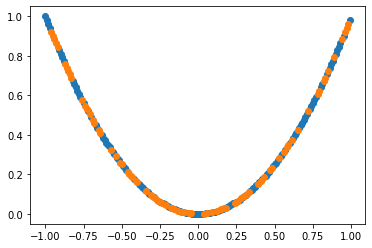

In [46]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0302
loss= 0.0014099462423473597
mae= 0.030183369293808937


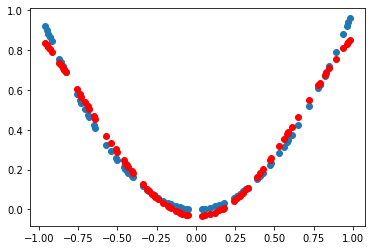

In [47]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mae = model.evaluate(x, y)
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

# sine_data 얻기

In [48]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

# 노드 수에 따른 loss 변화 보기
- hidden layer : Dense Layer * 5
- batch_size : 10

In [49]:
def modelNode(N):
    model = keras.Sequential()
    model.add(Input(1))
    model.add(Dense(N,activation='tanh'))
    model.add(Dense(N,activation='tanh'))
    model.add(Dense(N,activation='tanh'))
    model.add(Dense(N,activation='tanh'))
    model.add(Dense(N,activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer = "SGD", loss = "mse", metrics = ["mae"])

    return model

def modelPredictGraph(model,x,y):
    y_ = model.predict(x,y)
    plt.scatter(x,y)
    plt.scatter(x,y_)
    # plt.show()

def mainStart(num):
    (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)



    for i in range(1,num):
        print("model ",i,"start!")
        start_time = time.time()
        model = modelNode(i)
        hist = model.fit(train_x,train_y,epochs= 500,batch_size = 10,verbose=False,validation_split = 0.1)
        loss, mae = model.evaluate(test_x,test_y)
        pred_y = model.predict(test_x)
        print("elapsed : {}".format(time.time() - start_time))  

        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.show()

model  1 start!
2/2 [==============================] - 0s 7ms/step - loss: 0.4482 - mae: 0.5858
elapsed : 15.7590970993042


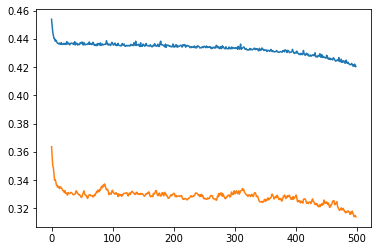

model  2 start!
2/2 [==============================] - 0s 8ms/step - loss: 0.4565 - mae: 0.5868
elapsed : 15.654895067214966


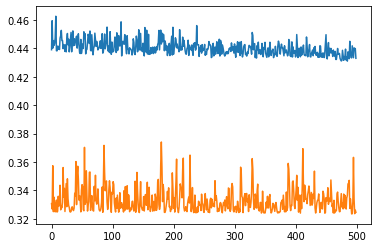

model  3 start!
2/2 [==============================] - 0s 9ms/step - loss: 0.3610 - mae: 0.4776
elapsed : 16.9573175907135


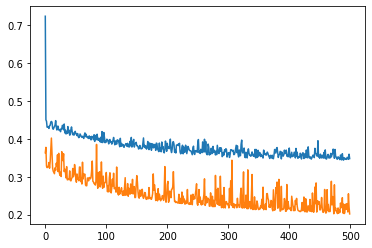

model  4 start!
2/2 [==============================] - 0s 10ms/step - loss: 0.2209 - mae: 0.3948
elapsed : 16.57410979270935


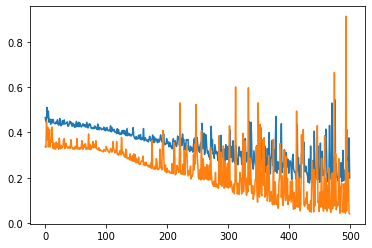

model  5 start!
2/2 [==============================] - 0s 8ms/step - loss: 0.1596 - mae: 0.3113
elapsed : 16.072711944580078


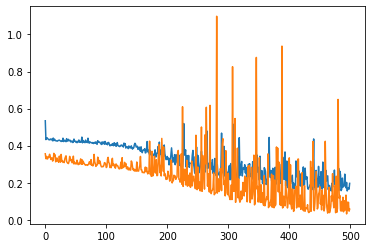

model  6 start!
2/2 [==============================] - 0s 8ms/step - loss: 0.3590 - mae: 0.4714
elapsed : 15.709008693695068


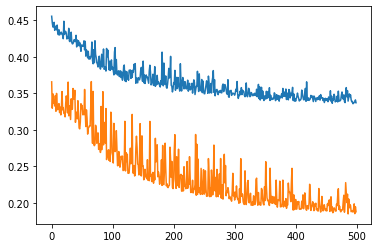

model  7 start!
2/2 [==============================] - 0s 9ms/step - loss: 0.1009 - mae: 0.2332
elapsed : 16.739655017852783


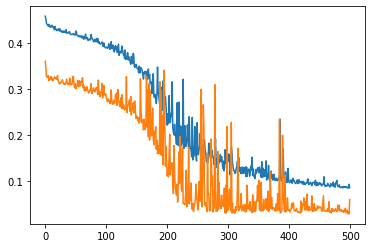

model  8 start!
2/2 [==============================] - 0s 12ms/step - loss: 0.1028 - mae: 0.2221
elapsed : 16.01669955253601


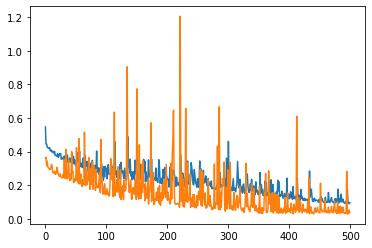

model  9 start!
2/2 [==============================] - 0s 10ms/step - loss: 0.0901 - mae: 0.2118
elapsed : 15.783640384674072


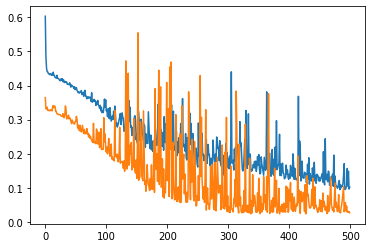

In [50]:
mainStart(10)

5개의 hidden layer를 구성하는 노드의 개수가 증가함에 따라 loss와 val_loss의 차이가 좁혀지고, 두 loss 모두 감소하는 경향을 보인다.하지만 val_loss의 변동폭 역시 증가한다. 이 데이터 셋에 맞는 노드는 1~ 9개 중 9개 일때가 가장 적절하다.
- val loss, loss가 가장 작다.
- 마지막 epoch로 향할 수록 val loss와 loss의 차이가 줄어든다.

# Dense Layer 개수 변화에 따른 학습률 변화

In [51]:
def addDense(model,num):  
    if num == 1:
        return 
    model.add(Dense(10,activation="tanh"))
    return addDense(model,num-1)

def modelNode(N):
    model = keras.Sequential()
    model.add(Input(1))
    addDense(model,N)
    model.add(Dense(1))
  
    model.compile(optimizer = "SGD", loss = "mse", metrics = ["mae"])

    return model

def mainStart(num):
    for i in range(1,num):
        print("model ",i," Start!!")
        start_time = time.time()
        model = modelNode(i)
        hist = model.fit(train_x,train_y,epochs=1000,batch_size= 20,verbose = False,validation_split = 0.1)
        loss, mae = model.evaluate(test_x,test_y)
        pred_y = model.predict(test_x)

        print("practice time : ",(time.time() - start_time))
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.show()
        print("모델",i,"의 loss :",loss, "mae : ", mae)


model  1  Start!!
3/3 [==============================] - 0s 4ms/step - loss: 0.0937 - mae: 0.2643
practice time :  41.356924533843994


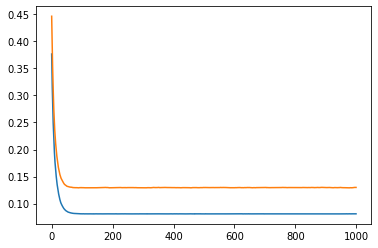

모델 1 의 loss : 0.09367802739143372 mae :  0.2643498480319977
model  2  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0375
practice time :  32.74535417556763


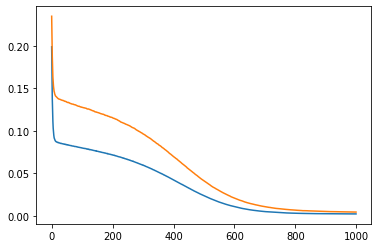

모델 2 의 loss : 0.00241909665055573 mae :  0.03749365359544754
model  3  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 0.0034 - mae: 0.0474
practice time :  29.41613221168518


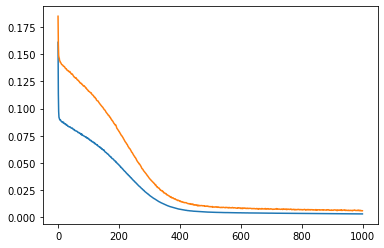

모델 3 의 loss : 0.0033848665188997984 mae :  0.0473744198679924
model  4  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 0.0028 - mae: 0.0422
practice time :  29.506006479263306


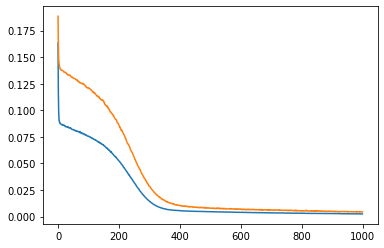

모델 4 의 loss : 0.0027577574364840984 mae :  0.04216470196843147
model  5  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 0.0010 - mae: 0.0249
practice time :  29.90574884414673


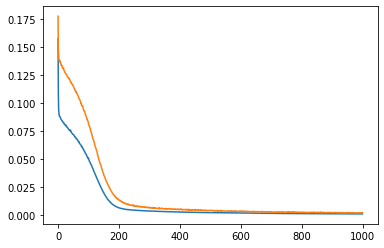

모델 5 의 loss : 0.0010437620803713799 mae :  0.024905670434236526
model  6  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 0.0011 - mae: 0.0254
practice time :  30.713963747024536


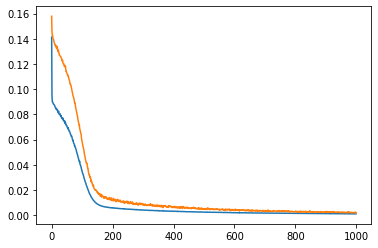

모델 6 의 loss : 0.0010788554791361094 mae :  0.025418955832719803
model  7  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 6.7090e-04 - mae: 0.0201
practice time :  31.10170269012451


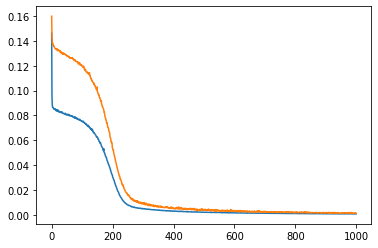

모델 7 의 loss : 0.0006709030130878091 mae :  0.020094528794288635
model  8  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 7.8535e-04 - mae: 0.0209
practice time :  33.754417419433594


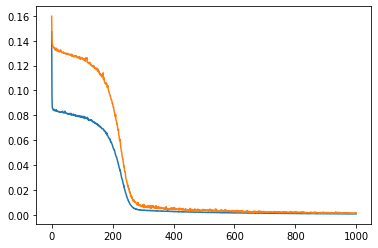

모델 8 의 loss : 0.0007853477145545185 mae :  0.020926345139741898
model  9  Start!!
3/3 [==============================] - 0s 5ms/step - loss: 2.7244e-04 - mae: 0.0125
practice time :  32.25887084007263


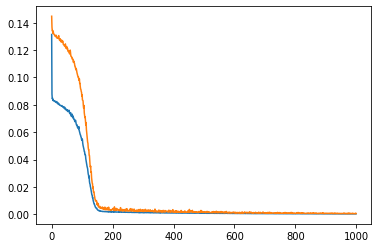

모델 9 의 loss : 0.00027244072407484055 mae :  0.01253402978181839


In [52]:
mainStart(10)

재귀함수를 통해 hidden layer의 수를 점진적으로 증가시킨 후 loss를 그렸다.
- hidden layer의 수가 증가함에 따라 loss와 valoo가 만나는 epoch가 작아지는 경향이 보인다.
- hidden layer가 증가하면 모델이 점점 깊어지고(deep) 추상화된 형태를 인식한다.


# 학습 횟수에 따른 변화

In [53]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 10.261613607406616


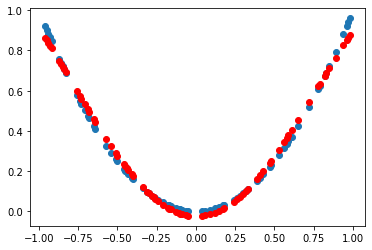

1 times fitting
elapsed : 10.193851709365845


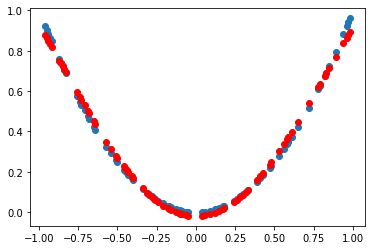

2 times fitting
elapsed : 10.2623450756073


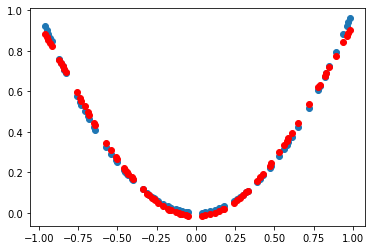

3 times fitting
elapsed : 10.062090158462524


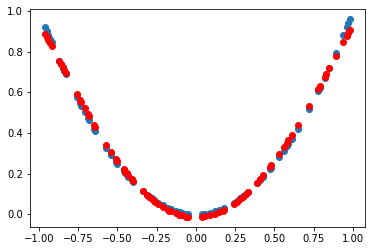

4 times fitting
elapsed : 10.175924301147461


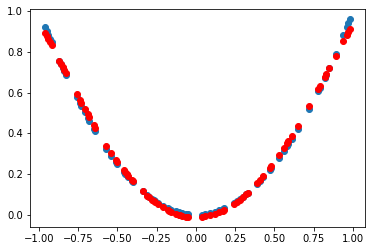

5 times fitting
elapsed : 10.178729057312012


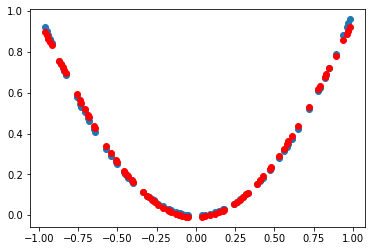

6 times fitting
elapsed : 10.427414894104004


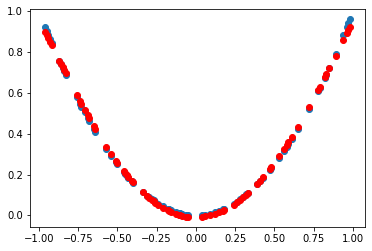

7 times fitting
elapsed : 10.260563850402832


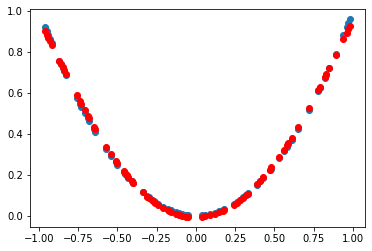

8 times fitting
elapsed : 10.268306016921997


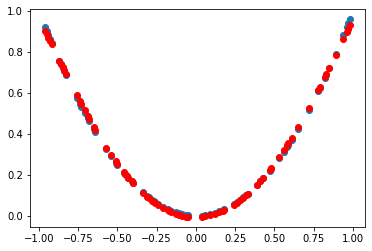

9 times fitting
elapsed : 10.09129786491394


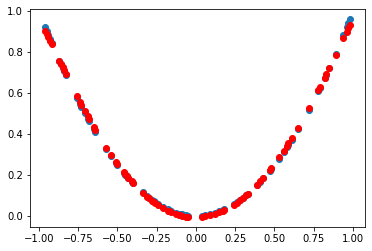

In [54]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습 횟수를 1000 단위로 증가시켰다. 처음의 1000, 2000을 제외하고 3000 ~ 9000의 예측은 유사하다.
- 이 데이터셋에서 적절한 학습횟수는 3000번 또는 4000번 이다.

# batch_size 테스트

In [55]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for batch in n:
    print("{} times fitting".format(batch))
    fit_one_more(model, train_x, train_y, test_x, test_y,batch)


10 times fitting
elapsed : 28.163012266159058


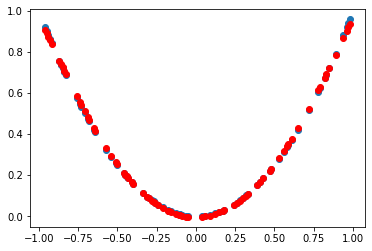

50 times fitting
elapsed : 20.772611141204834


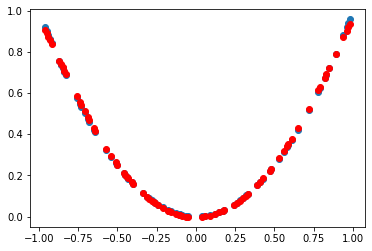

100 times fitting
elapsed : 10.292540311813354


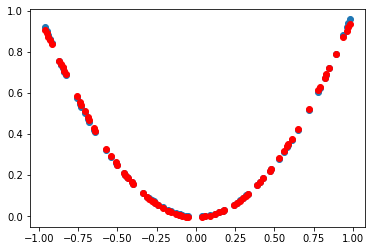

200 times fitting
elapsed : 5.083081483840942


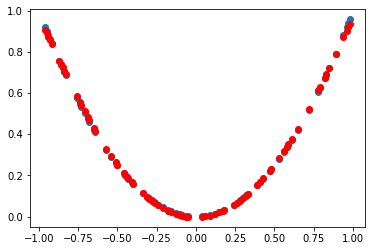

In [56]:
fit_n_times(model,train_x,train_y,test_x, test_y,[10,50,100,200])

batch size를 늘릴 수록 실행 시간이 감소한다. 학습 횟수 역시 감소하기 때문에 오차가 생겨야하지만, 데이터 셋이 작아서 batch size 10 , 50 ,100, 200의 영향이 미미하다.
- 이 데이터 셋에서는 실행 시간이 짧은 batch size 200을 선택하는 것이 적절하다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


# 학습 중 섞지 않으면 순서에 따라 편향이 일어날 수 있다.

In [57]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 10)                20        
                                                                 
 dense_217 (Dense)           (None, 10)                110       
                                                                 
 dense_218 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.7174041271209717


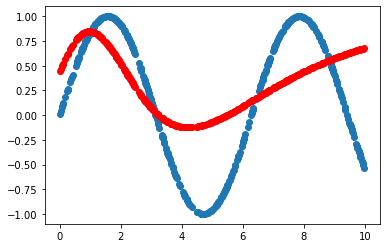

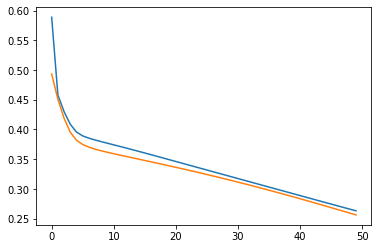

In [58]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
hist = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20,shuffle=False,validation_split = 0.1)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_219 (Dense)           (None, 10)                20        
                                                                 
 dense_220 (Dense)           (None, 10)                110       
                                                                 
 dense_221 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.374020576477051


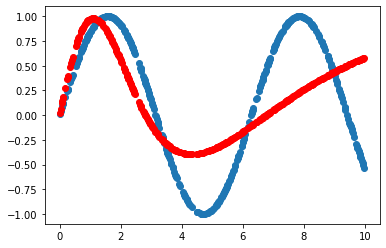

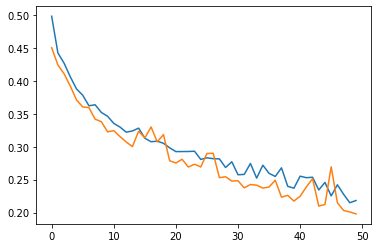

In [59]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
hist = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True,validation_split=0.1) 
# default가 True, epoch 마다 train set을 x,y 쌍을 유지하고 섞어준다.
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()


# 모델 저장

In [60]:
new_model = model.save('my_model.h5') # 케라스 형식으로 저장
new_model = model.save('my_model') # 텐서플로 방식으로 저장 
!ls -al

INFO:tensorflow:Assets written to: my_model/assets
total 44
drwxr-xr-x 1 root root  4096 Dec 21 06:52 .
drwxr-xr-x 1 root root  4096 Dec 21 06:16 ..
drwxr-xr-x 4 root root  4096 Dec  3 14:33 .config
drwxr-xr-x 4 root root  4096 Dec 21 08:12 my_model
-rw-r--r-- 1 root root 20736 Dec 21 08:12 my_model.h5
drwxr-xr-x 1 root root  4096 Dec  3 14:33 sample_data


In [61]:
from tensorflow import keras
new_model = keras.models.load_model('my_model.h5') # 케라스 형식으로 로딩
new_model2 = keras.models.load_model('my_model') # 텐서플로 방식으로 로딩


# gpu 설정

In [62]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


In [63]:
!nvidia-smi

Tue Dec 21 08:12:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    34W / 250W |    451MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## gpu 사용 vs cpu 사용

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 10)                20        
                                                                 
 dense_223 (Dense)           (None, 10)                110       
                                                                 
 dense_224 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.438807964324951


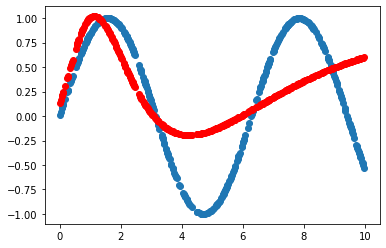

In [64]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_225 (Dense)           (None, 10)                20        
                                                                 
 dense_226 (Dense)           (None, 10)                110       
                                                                 
 dense_227 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.6264111995697021


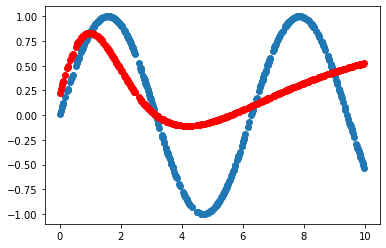

In [65]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

cpu를 사용했을 떄의 시간이 GPU를 사용했을 때보다 더 빠르다.
batch size가 작아서 gpu와 cpu의 데이터 전달 속도의 제약의 비중이 크기 때문이다.